In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [3]:
df=pd.read_csv(r'C:\Users\deeks\OneDrive\Desktop\data science\cardata.csv')

In [4]:
df


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [11]:
df['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [13]:
df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [14]:
df.replace({'Fuel_Type':{'Petrol':0,
'Diesel':1,'CNG':2}},inplace=True)

In [18]:
df.replace({'Seller_Type':{'Dealer':0,
'Individual':1}},inplace=True)

In [16]:
df.replace({'Transmission':{'Manual':0,
'Automatic':2}},inplace=True)

In [19]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [21]:
x=df.drop(['Car_Name','Selling_Price'],axis=1)

In [22]:
y=df['Selling_Price']

In [23]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [24]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [27]:
pred=model.predict(x_test)

In [28]:
pred

array([ 7.15109403e+00, -4.23597596e-01,  4.29317385e+00,  8.65452674e+00,
        1.41567775e+01,  4.90831522e+00,  3.53467957e+00,  1.44629982e+00,
        5.38203747e+00,  4.66822329e+00,  2.25436652e+00,  1.62369073e+00,
        5.10340136e+00,  7.63583986e+00,  8.25142614e+00,  1.42107233e+01,
        7.39937849e+00,  4.27934188e+00, -4.57454953e-01,  2.39120792e+00,
        5.03077854e+00,  3.81276384e+00,  6.49858604e+00,  8.14607684e+00,
       -1.93080143e+00,  1.94357130e+00, -8.19148942e-01,  8.21481213e-01,
        2.20224230e-03,  7.20531002e+00,  3.07786554e+00,  7.05021502e+00,
        7.21562252e-01,  7.54652493e+00,  3.56884281e+00,  1.81884781e+00,
        5.60660404e+00,  6.59162587e+00, -2.73350542e+00,  8.75806929e+00,
        8.84199116e+00,  1.99052379e+01,  4.40391107e+00,  3.86694215e+00,
        6.26329178e+00,  9.51709125e+00,  1.22523783e-01,  1.68957499e+00,
        5.17960418e+00,  6.95950453e+00,  8.16014675e+00,  4.19806813e+00,
        4.92838461e+00,  

In [29]:
y_test

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
       ...  
137     0.65
227     2.55
26      4.15
106     1.35
92      3.51
Name: Selling_Price, Length: 61, dtype: float64

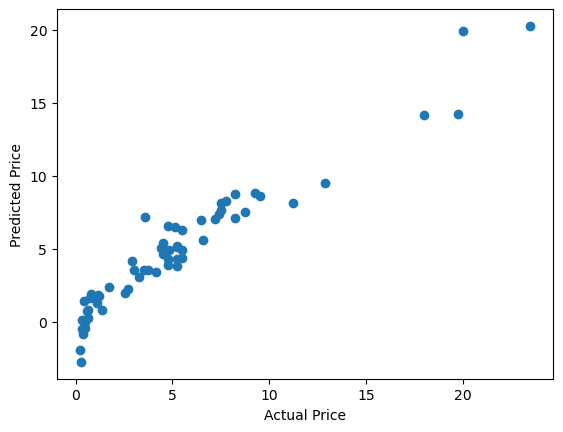

In [30]:
plt.scatter(y_test,pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [31]:
mean=metrics.mean_absolute_error(y_test,pred)
print("Mean Absolute error:",mean)

Mean Absolute error: 1.0000326012146674
